## Creating a DNN for the MNIST Dataset

### 1. Import Data

In [13]:
import tensorflow.keras.datasets.mnist as mnist
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0   # rescale the images to be between 0 and 1
x_test = x_test / 255.0     # rescale the images to be between 0 and 1

### 2. Plot the Data samples

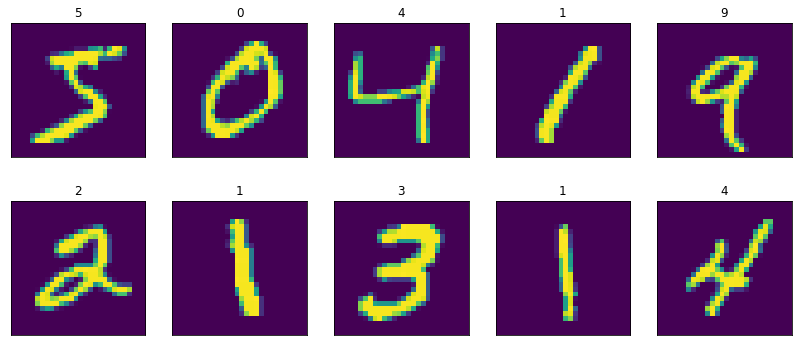

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(14,6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.title('%d' % y_train[i])
plt.show()

In [15]:
import numpy as np

y_train_target = np.eye(10)[y_train]
y_test_target = np.eye(10)[y_test]
print('original target:', y_train[0])
print('  vector target:', y_train_target[0])

original target: 5
  vector target: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 3. Train Model

In [16]:
model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),   # input is a 28x28 image
      tf.keras.layers.Dense(64, activation='relu'),    # 64 neurons in the middle "hidden" layer
      tf.keras.layers.Dense(10, activation='softmax')  # 10 outputs (one for each category)
    ])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']  # in addition to the loss, also compute the categorization accuracy
             )

model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))   # note that we now use y_train, not y_train_target

Epoch 1/10
1875/1875 [==============================] - 2s 747us/step - loss: 0.4951 - accuracy: 0.8626 - val_loss: 0.1716 - val_accuracy: 0.9496
Epoch 2/10
1875/1875 [==============================] - 1s 715us/step - loss: 0.1544 - accuracy: 0.9554 - val_loss: 0.1197 - val_accuracy: 0.9651
Epoch 3/10
1875/1875 [==============================] - 1s 683us/step - loss: 0.1061 - accuracy: 0.9680 - val_loss: 0.1028 - val_accuracy: 0.9689
Epoch 4/10
1875/1875 [==============================] - 1s 690us/step - loss: 0.0784 - accuracy: 0.9770 - val_loss: 0.0929 - val_accuracy: 0.9707
Epoch 5/10
1875/1875 [==============================] - 1s 690us/step - loss: 0.0688 - accuracy: 0.9794 - val_loss: 0.0867 - val_accuracy: 0.9743
Epoch 6/10
1875/1875 [==============================] - 1s 788us/step - loss: 0.0560 - accuracy: 0.9827 - val_loss: 0.0926 - val_accuracy: 0.9714
Epoch 7/10
1875/1875 [==============================] - 1s 694us/step - loss: 0.0459 - accuracy: 0.9859 - val_loss: 0.0800 -

### 4. Check classification

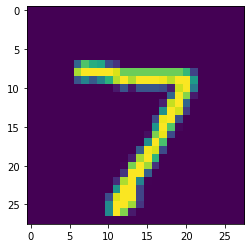

actual output from network: [1.11490221e-08 3.61086866e-13 5.10754944e-07 1.19417045e-05
 2.03533394e-14 1.29973310e-09 5.18593978e-18 9.99987006e-01
 9.84932313e-09 4.43846432e-07]
category (the largest output): 7


In [17]:
output = model.predict(x_test)
category = np.argmax(output, axis=1)

plt.imshow(x_test[0])
plt.show()
print('actual output from network:', output[0])
print('category (the largest output):', category[0])

# Note the 7th index of the list is the largest value so it is classifies the point as 7

### 5. Evaluate Model

In [29]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=128)
print("test loss, test acc:", results)

Evaluate on test data
79/79 [==============================] - 0s 816us/step - loss: 0.0935 - accuracy: 0.9731
test loss, test acc: [0.09346762299537659, 0.9731000065803528]
